# **1D Map Conjugacy for the Kuramoto-Sivashinsky PDE**

In [1]:
import numpy as np
from utils import Kuramoto
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Set plotting parameters
parameters = {'axes.labelsize': 16,
              'axes.titlesize': 18,
              'legend.fontsize': 13,
              'xtick.labelsize': 16,
              'ytick.labelsize': 16,
              'figure.figsize': (12, 8),
              'figure.titlesize': 18,
              'font.serif': 'Computer Modern Roman',
             }
plt.rcParams.update(parameters)
plt.rc('text', usetex=True)

## **Generate Measurement Data**

In [2]:
# Continuous-time simulation data

# Initializations
dt = .005
nu = 0.0298
modes = 14 
t_span = np.arange(0, 5000, dt)
x0 = 0.1*np.random.rand(modes)

# Solution data
xsol = []
xsol = odeint(Kuramoto, x0, t_span,args = (nu,modes,))

Text(0, 0.5, '$x_{10}(t)$')

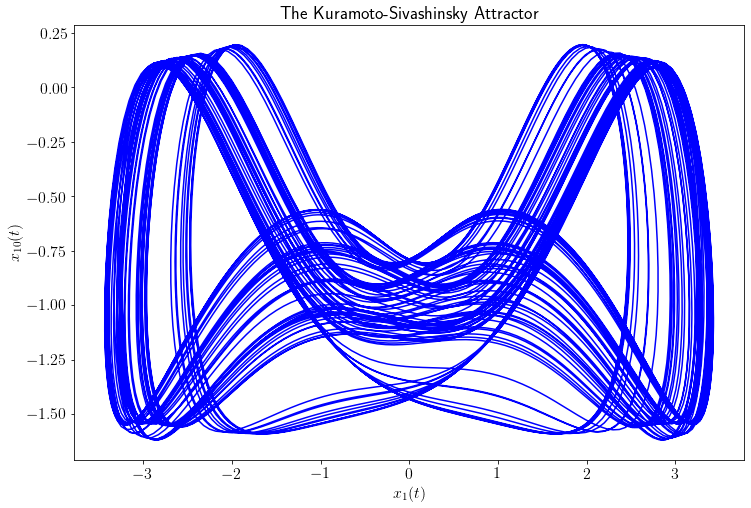

In [3]:
# Plot Kuramoto-Sivashinsky Solution (x_10 vs. x_1)

plt.plot(xsol[1000:10000,0],xsol[1000:10000,9],'b')
plt.title("The Kuramoto-Sivashinsky Attractor")
plt.xlabel("$x_1(t)$")
plt.ylabel("$x_{10}(t)$")

In [4]:
# Create section data

Psec = []
temp = [0]*len(xsol[:,1])
count = 0
for m in range(len(temp)-1):
    if xsol[m,0] <= 0 and xsol[m+1,0] >= 0: # section condition: x_1 = 0
        temp[count] = xsol[m,1:] 
        count = count + 1
Psec.append(np.array(temp[1:count]))   

xn, xnp1 = Psec[0][:-1], Psec[0][1:]

#Scale data
max_xn = xn.max()
min_xn = xn.min()

slope = 1/(max_xn - min_xn)
yint = -slope*min_xn

xn = slope*xn + yint
xnp1 = slope*xnp1 + yint

# Build input data matrix of forward iterates
forward_iters = 50
xnforward = []

xnp1 = xnp1[:-forward_iters] 
for j in range(forward_iters): 
    xnforward.append(xn[j:-forward_iters+j])

Text(0, 0.5, '$x_{2,n+1}$')

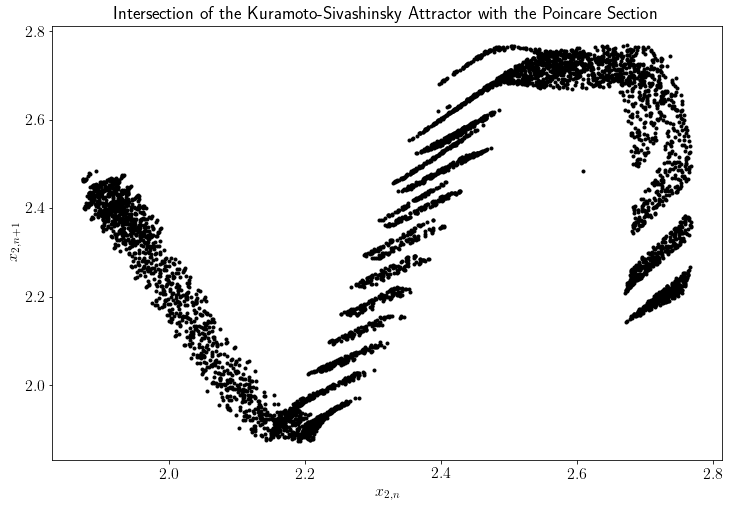

In [5]:
# Plot Rossler Section Data

plt.plot(Psec[0][:-1,1],Psec[0][1:,1],'k.')
plt.title("Intersection of the Kuramoto-Sivashinsky Attractor with the Poincare Section")
plt.xlabel("$x_{2,n}$")
plt.ylabel("$x_{2,n+1}$")

## **Network Training**

In [6]:
import tensorflow as tf
from architecture_1D import Conjugacy

width = 200
size_x = 13 #number of x variables
degree = 2 #degree of latent mapping
activation = 'selu'
steps = 1
numblks_in = 4
numblks_out = 4
c1 = 3.5 # initialized mapping coefficients
c2 = -3.5
c3 = 0.0
c4 = 0.0
c5 = 0.0
stretchloss = 1
learning_rate = 0.00001

conjugacy = Conjugacy(width, size_x, activation, degree, steps, numblks_in, numblks_out, c1, c2, c3, c4, c5, stretchloss)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 10) # patience is set intentially low to speed up examples

optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
conjugacy.compile(optimizer=optimizer, loss = 'mse')

conjugacy.fit(xnforward, xnp1, callbacks = [callback], epochs = 1000)

Epoch 1/1000
178/178 [==============================] - 1s 4ms/step - loss: 1.4668
Epoch 2/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.4343
Epoch 3/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.3902
Epoch 4/1000
178/178 [==============================] - 1s 5ms/step - loss: 0.3174
Epoch 5/1000
178/178 [==============================] - 1s 5ms/step - loss: 0.1827
Epoch 6/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1407
Epoch 7/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1058
Epoch 8/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.0735
Epoch 9/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.0554
Epoch 10/1000
178/178 [==============================] - 1s 5ms/step - loss: 0.0481
Epoch 11/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.0454
Epoch 12/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.0438
E

## **Network Output**

In [7]:
# Print Discovered Mapping

print('Discovered Conjugate Mapping:')
print('')
print('g(y) =',conjugacy.c1.numpy(),'*y +',conjugacy.c2.numpy(),'*y^2')

# Network Summary
print('')
conjugacy.summary()

Discovered Conjugate Mapping:

g(y) = 3.6148577 *y + -3.4672494 *y^2

Model: "conjugacy"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 1)                 123601    
_________________________________________________________________
sequential_1 (Sequential)    (None, 13)                123613    
Total params: 247,219
Trainable params: 247,216
Non-trainable params: 3
_________________________________________________________________
